# Overlay Elements

Code for the transform is based on the code from [https://github.com/danaaubakirova/doc-augmentation](https://github.com/danaaubakirova/doc-augmentation) by [Dana Aubakirova](https://www.linkedin.com/in/dana-aubakirova-3220981ab/)

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
!pip install -U pillow

In [ ]:
%matplotlib inline

In [ ]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
from PIL import ImageDraw, ImageFont, Image

In [ ]:
from pylab import *

In [ ]:
import albumentations as A

In [ ]:
import json

In [ ]:
def visualize(image):
    plt.figure(figsize=(20, 10))
    plt.axis('off')
    plt.imshow(image)

In [ ]:
def load_rgb(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
font_path = "../data/documents/LiberationSerif-Regular.ttf"

In [ ]:
image = load_rgb("../data/documents/docs.png")

In [ ]:
with open("../data/documents/text.json") as f:
    labels = json.load(f)

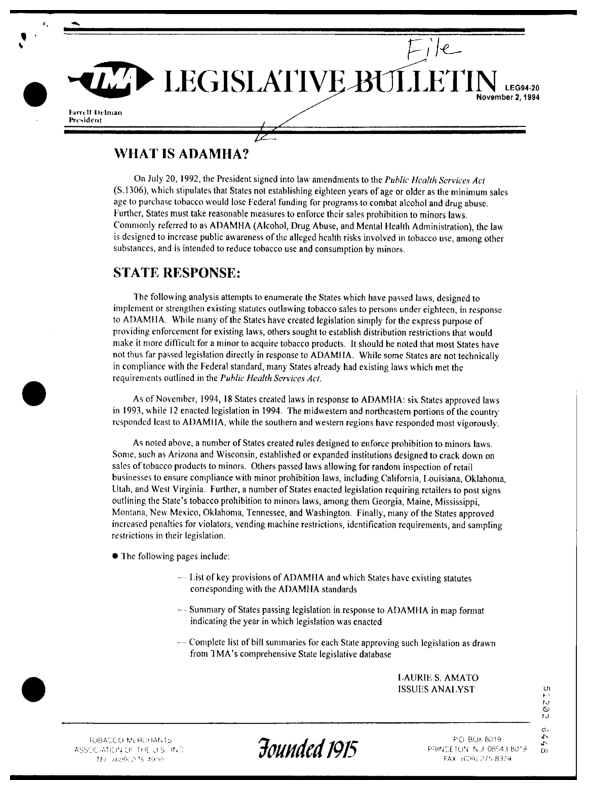

In [ ]:
visualize(image)

In [ ]:
transform = A.Compose([A.OverlayElements(p=1)])

## Render images to paste

In [ ]:
def render_text(bbox_shape, text, font):
    bbox_height, bbox_width = bbox_shape

    # Create an empty RGB image with the size of the bounding box
    bbox_img = Image.new("RGB", (bbox_width, bbox_height), color="white")
    draw = ImageDraw.Draw(bbox_img)

    # Draw the text in red
    draw.text((0, 0), text, fill="red", font=font)

    return np.array(bbox_img)


In [ ]:
bbox_indices_to_update = np.random.choice(range(len(labels["text"])), 10)

In [ ]:
labels.keys()

dict_keys(['text', 'bbox', 'poly', 'score'])

In [ ]:
image_height, image_width = image.shape[:2]
num_channels = image.shape[2] if len(image.shape) == 3 else 1

In [ ]:
metadata = []
for index in bbox_indices_to_update:
    selected_bbox = labels["bbox"][index]

    # You may apply any transforms you want to text like random deletion, swapping words, applying synonims, etc
    text = labels["text"][index]

    left, top, width_norm, height_norm = selected_bbox

    bbox_height = int(image_height * height_norm)
    bbox_width = int(image_width * width_norm)

    font = ImageFont.truetype(font_path, int(0.90 * bbox_height))

    overlay_image = render_text((bbox_height, bbox_width), text, font)

    metadata += [
        {
            "image": overlay_image,
            "bbox": (left, top, left + width_norm, top + height_norm)
        }
    ]

## Paste new text to image

In [ ]:
transformed = transform(image=image, overlay_metadata=metadata)

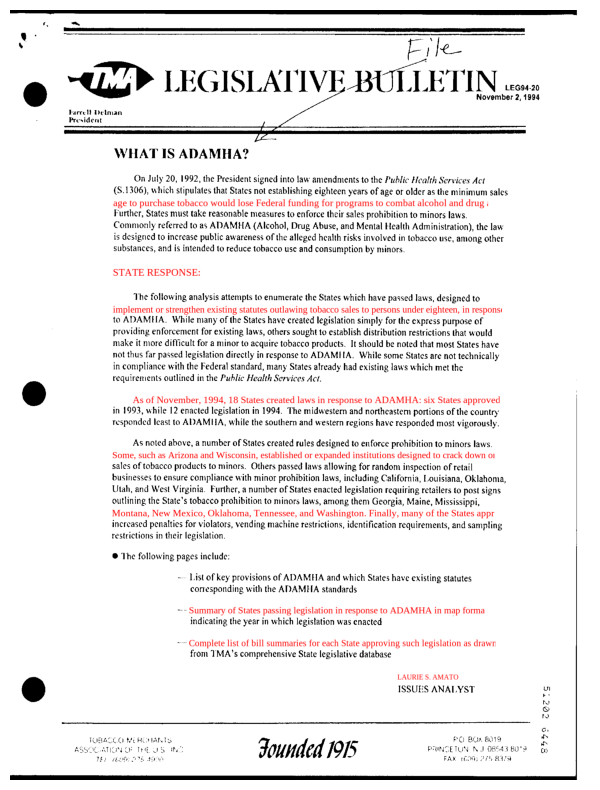

In [ ]:
visualize(transformed["image"])

## As a part of the augmentation pipeline

In [ ]:
transform_complex = A.Compose([A.OverlayElements(p=1),
                               A.RandomCrop(p=1, height=1024, width=1024),
                               A.PlanckianJitter(p=1),
                               A.Affine(p=1)
                              ])

In [ ]:
transformed = transform_complex(image=image, overlay_metadata=metadata)

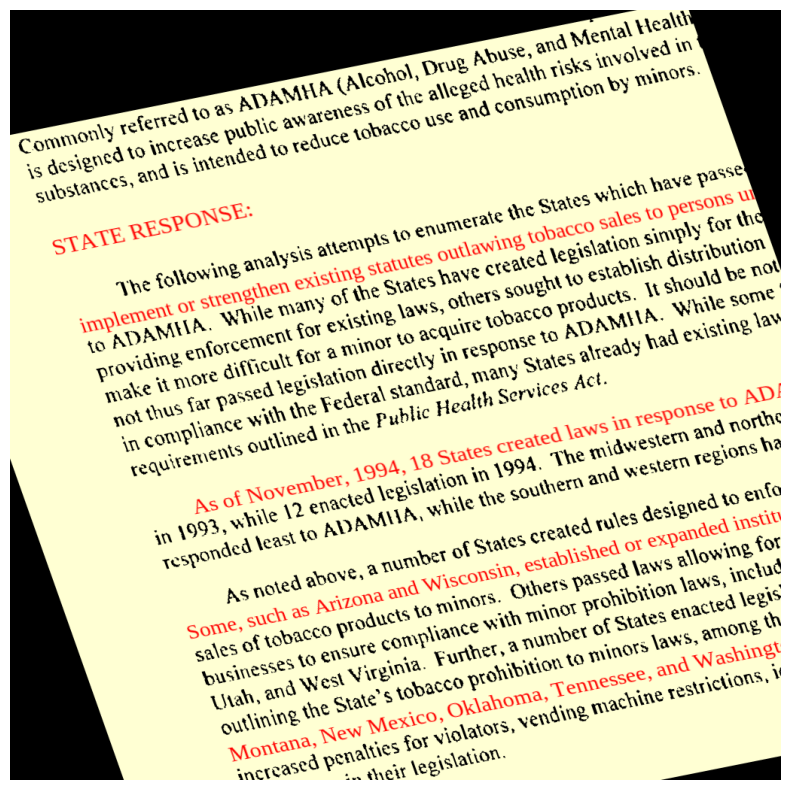

In [ ]:
visualize(transformed["image"])